# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Importando bibliotecas e criando o DataFrame
# 1, i) Carregando os dados e criando o DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Objeto de Árvore de Classificação
from sklearn.tree import plot_tree # Função para plotar a árvore
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./base_M7T1.csv')
df.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [2]:
# 1, ii) Transformando a variável target 'mau' em binária (0, 1) e dividindo as variáveis dependentes e independentes

# Converter colunas booleanas em int
colunas_bool = df.select_dtypes(include=['bool']).columns
df[colunas_bool] = df[colunas_bool].astype(int)

## Criando a divisão (X, y):
# y:
y = df.mau
y.reset_index

# X:
colunas_independentes = df.select_dtypes(include=['int64']).columns
X = df[colunas_independentes].drop(['qtd_filhos', 'mau'], axis=1)
X.reset_index
X

,possui_celular,possui_fone_comercial,possui_fone,possui_email,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,0,0,0,1,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,1,1,1,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
16647,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
16648,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [3]:
# 1, iii) Dividindo entre treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

<function matplotlib.pyplot.show(close=None, block=None)>

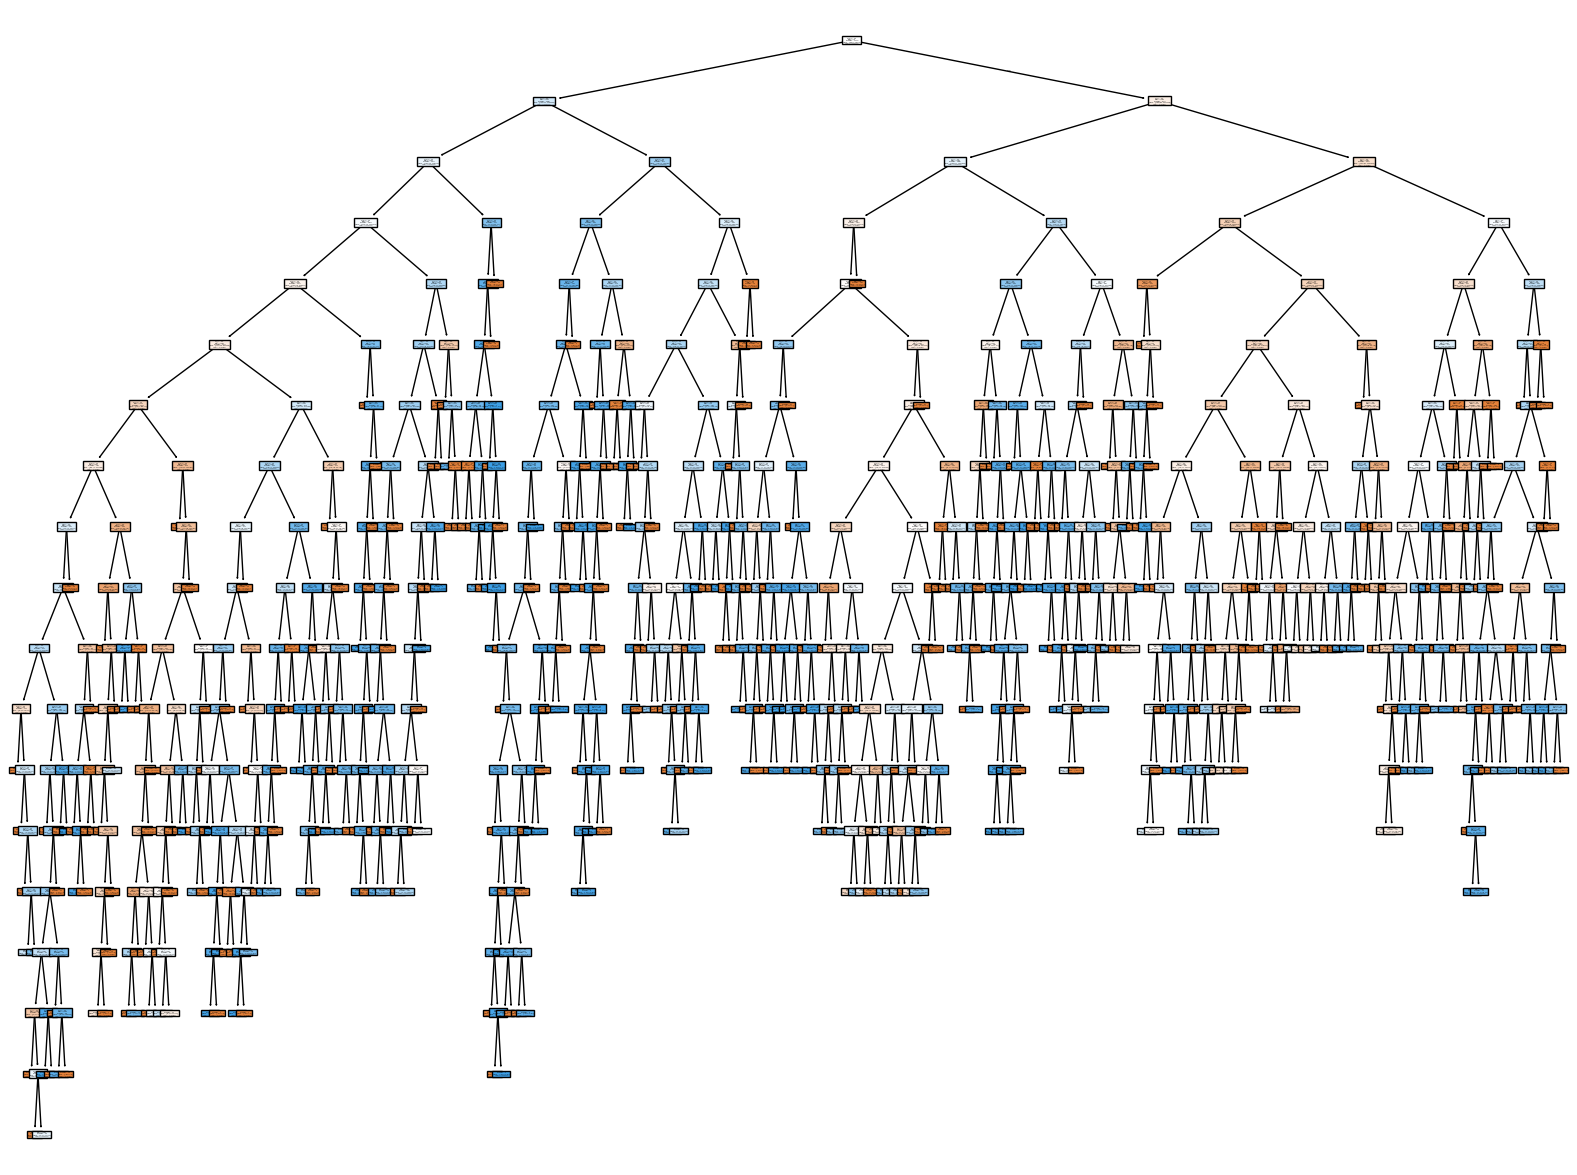

In [4]:
# 2, i) Criando a Árvore de Classificação

clf = DecisionTreeClassifier(random_state=54, class_weight='balanced') # Passando o argumento 'class_weight' por que as classes são muito esbalanceadas
clf.fit(X_train, y_train)
clf.predict(X_test)
plt.figure(figsize=(20,15))

# Plotando a árvore
plot_arvore = plot_tree( # Armazenando o plot da árvore numa variável para impedir o output de ser exibido
	clf,
	filled=True, # Colorir cada categoria de y
	class_names=['Aprovado', 'Reprovado'] # Lista com os nomes de cada classe, começando com mau=0 (Aprovado)
)

plt.show

#### Resultado da Árvore de Classificação
O resultado da árvore de classificação parece extremamente `complexo` e difícil de visualizar. Isso ocorre por que o alto número de variáveis criou uma árvore `overfittada`, isto é, temos overfitting no nosso modelo.

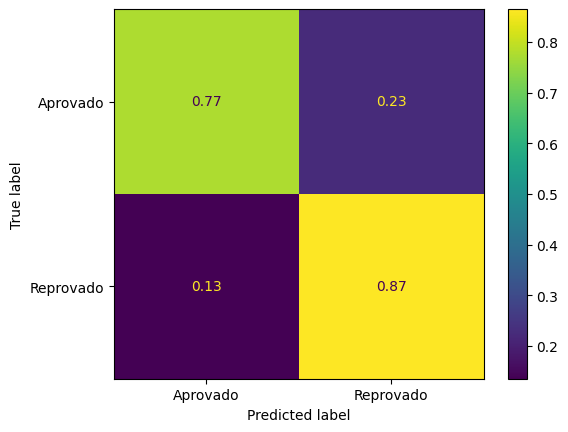

In [5]:
# 2, ii) Matriz de Confusão

# Matriz de Confusão de TREINAMENTO
cm_teste = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_, normalize='true') # Normalizando para não deixar o desbalanceamento de classes influenciar
matriz_confusao_teste = ConfusionMatrixDisplay(confusion_matrix=cm_teste, display_labels=['Aprovado', 'Reprovado']).plot()


In [6]:
# 2, iii) Acurácia com os dados de teste

# Calculando acurácia com os dados de teste
accuracy_score(y_test, clf.predict(X_test))

0.7593593593593594

A acurácia do modelo com os dados de teste não parece bater com os dados que a matriz de confusão dos dados de treinamento parecem nos mostrar, isto é um forte potencial de overfitting.

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

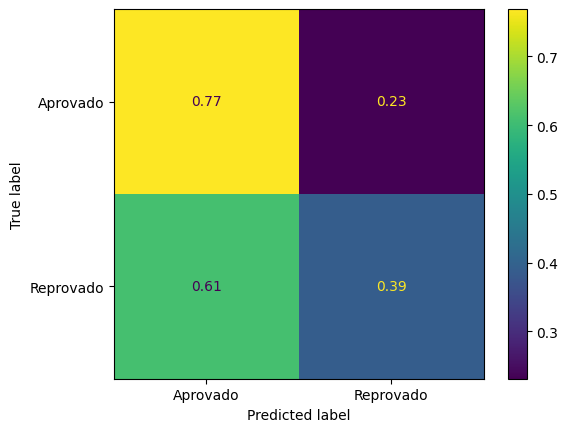

In [7]:
# 3, i) Classificando a base de teste

# Matriz de Confusão dos dados de TESTE
cm_teste = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_, normalize='true')
matriz_confusao_teste = ConfusionMatrixDisplay(
    confusion_matrix=cm_teste, 
    display_labels=['Aprovado', 'Reprovado']
).plot()

Como podemos ver, a matriz de confusão dos dados de Teste é ligeiramente diferente daquela dos dados de Treinamento.

In [8]:
# 3, ii) Comparando acurácias

acuracia_no_treinamento = accuracy_score(y_train, clf.predict(X_train))
acuracia_no_teste = accuracy_score(y_test, clf.predict(X_test))

print(f'A acurácia nos dados de treinamento é de {acuracia_no_treinamento}, enquanto a acurácia nos dados de teste é de {acuracia_no_teste}')

A acurácia nos dados de treinamento é de 0.7769197769197769, enquanto a acurácia nos dados de teste é de 0.7593593593593594


Proporção de proponentes classificados como maus: 27.31%


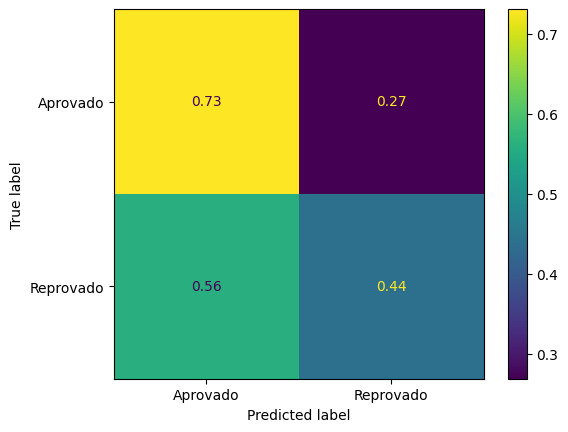

In [9]:
# 3, iii) Treinando uma nova árvore com parâmetros específicos
clf_podado = DecisionTreeClassifier(
    random_state=123,
    min_samples_leaf=5,
    max_depth=10,
    class_weight='balanced'
)

# Treinando o modelo
clf_podado.fit(X_train, y_train)

# Matriz de confusão para o novo modelo
cm_podado = confusion_matrix(y_test, clf_podado.predict(X_test), labels=clf_podado.classes_, normalize='true')
matriz_confusao_new = ConfusionMatrixDisplay(
    confusion_matrix=cm_podado,
    display_labels=['Aprovado', 'Reprovado']
).plot()

# Calculando a proporção de proponentes classificados como 'maus'
proporcao_maus = (clf_podado.predict(X_test) == 1).mean()
print(f'Proporção de proponentes classificados como maus: {proporcao_maus:.2%}')

In [10]:
# 3, v) Calculando a acurácia se classificasse todos como 'bons'
y_pred_todos_bons = np.zeros(len(y_test))  # Cria array de zeros do mesmo tamanho que y_test
acuracia_todos_bons = accuracy_score(y_test, y_pred_todos_bons)
print(f'\nAcurácia se classificasse todos como bons: {acuracia_todos_bons:.2%}')


Acurácia se classificasse todos como bons: 97.54%


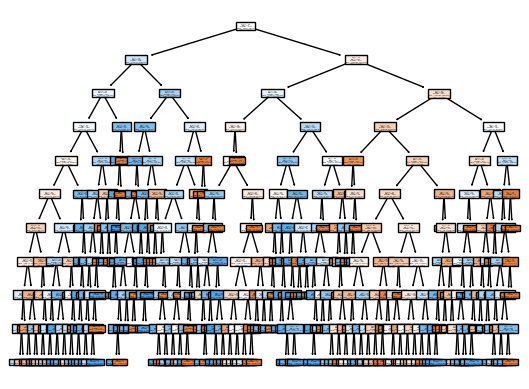

In [11]:
plot_arvore = plot_tree(
	clf_podado,
	filled=True,
	class_names=['Aprovado', 'Reprovado']
)